<a href="https://colab.research.google.com/github/aqafridi/TensorFlow/blob/main/Tensorflow_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Single Neuron

In [24]:
from tensorflow import keras
import numpy as np
model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='adam',loss='mean_squared_error')
xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0], dtype=float)
model.fit(xs,ys,epochs=5000,verbose=False)

In [4]:
model.predict([10])

array([[19.999994]], dtype=float32)

#multiple neuron

In [21]:
from tensorflow import keras
import numpy as np
model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[1]),
                        keras.layers.Dense(units=10),keras.layers.Dense(units=1)])
model.compile(optimizer='adam',loss='mean_squared_error')
xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0], dtype=float)
model.fit(xs,ys,epochs=5000,verbose=False)
test_loss = model.evaluate(xs, ys)

1/1 [==============================] - 0s 63ms/step - loss: 1.5916e-12


In [6]:
model.predict([10])

array([[19.998728]], dtype=float32)

#Computer Vision

In [16]:
from tensorflow import keras
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(units=128,activation='relu'),
                        keras.layers.Dense(units=10,activation='softmax')
                        ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10, verbose=False)
test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5226 - accuracy: 0.8282


In [38]:
img=x_test[1004]
img = img.reshape(1, 784)
model.predict(img)

array([[0.10656185, 0.10638779, 0.10708158, 0.10709922, 0.10708805,
        0.03853885, 0.10726833, 0.10674466, 0.10734092, 0.10588875]],
      dtype=float32)

#Callbacks

In [17]:
import tensorflow as tf
from tensorflow import keras
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(units=512,activation='relu'),
                        keras.layers.Dense(units=10,activation='softmax')
                        ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10, callbacks=[callbacks],verbose=False)
test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5136 - accuracy: 0.8370


#CNN

In [18]:
from tensorflow import keras
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()
model=keras.Sequential([keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
                        keras.layers.MaxPool2D(pool_size=(2,2)),
                        keras.layers.Conv2D(64,(3,3),activation='relu'),
                        keras.layers.MaxPool2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(units=512,activation='relu'),
                        keras.layers.Dense(units=10,activation='softmax')
                        ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,verbose=False)
test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4592 - accuracy: 0.4749


In [11]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()
model.fit(training_images, training_labels, epochs=5,verbose=False)
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.9059


In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10,verbose=False)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.4.1
313/313 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9865
0.9865000247955322


#Real-world Images
##image generator

In [ ]:
from tensorflow import keras
import tensorflow as tf
train_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,target_size=(300,300,3),batch_size=128,classmode='binary')

test_gene=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator=test_gene.flow_from_directory(
    valid_dir,target_size=(300,300,3),batch_size=32,classmode='binary')

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

history=model.fit_generator(train_generator,steps_per_epoch=8,epochs=5,
                            validation_data=validation_generator,
                            validation_steps=8,verbose=2)

#Horse and Human 

In [25]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

--2021-03-31 18:16:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.8.16, 172.217.13.240, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.8.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  53.4MB/s    in 2.7s    

2021-03-31 18:16:55 (53.4 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



['horse21-7.png', 'horse23-1.png', 'horse37-3.png', 'horse25-6.png', 'horse35-7.png', 'horse04-2.png', 'horse41-4.png', 'horse06-6.png', 'horse20-3.png', 'horse29-2.png']
['human09-13.png', 'human09-18.png', 'human01-09.png', 'human10-23.png', 'human08-15.png', 'human15-15.png', 'human01-24.png', 'human14-14.png', 'human02-13.png', 'human06-28.png']
total training horse images: 500
total training human images: 527


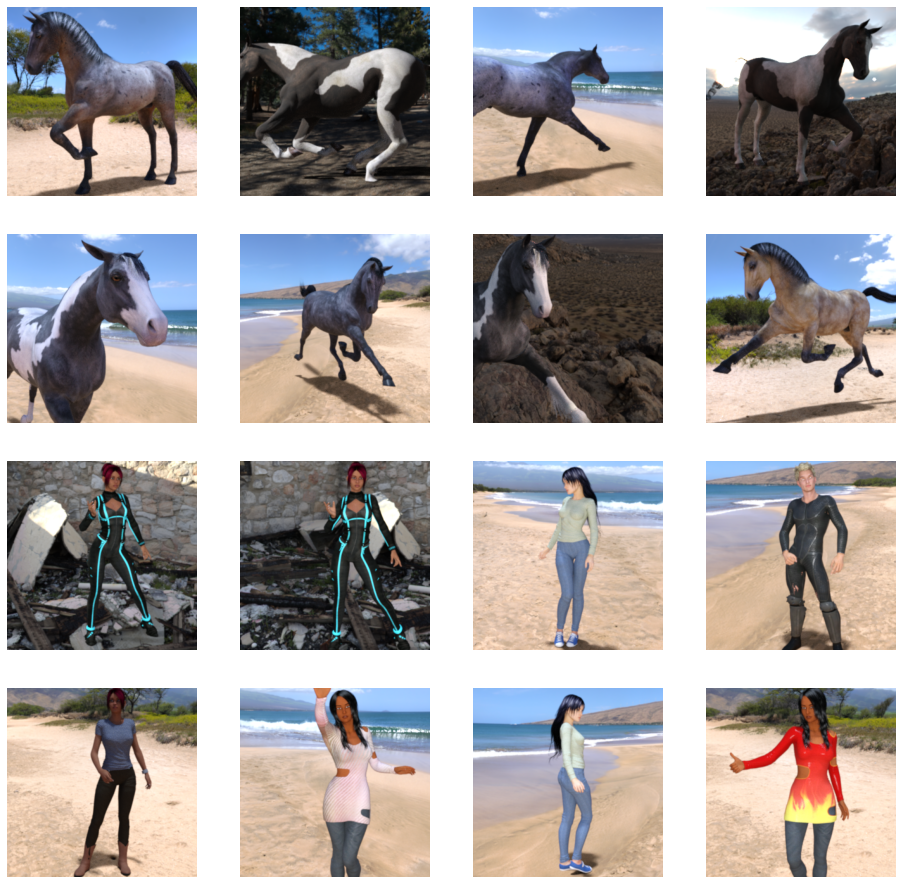

In [26]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [27]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# model.summary()
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Found 1027 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 9s 625ms/step - loss: 1.0136 - accuracy: 0.5317
Epoch 2/15
8/8 [==============================] - 6s 808ms/step - loss: 0.7675 - accuracy: 0.6567
Epoch 3/15
8/8 [==============================] - 6s 686ms/step - loss: 0.5259 - accuracy: 0.7465
Epoch 4/15
8/8 [==============================] - 6s 694ms/step - loss: 0.4082 - accuracy: 0.8266
Epoch 5/15
8/8 [==============================] - 6s 690ms/step - loss: 0.4519 - accuracy: 0.7670
Epoch 6/15
8/8 [==============================] - 6s 798ms/step - loss: 0.3989 - accuracy: 0.8687
Epoch 7/15
8/8 [==============================] - 6s 684ms/step - loss: 0.1245 - accuracy: 0.9520
Epoch 8/15
8/8 [==============================] - 6s 789ms/step - loss: 0.0835 - accuracy: 0.9686
Epoch 9/15
8/8 [==============================] - 6s 679ms/step - loss: 0.1721 - accuracy: 0.9481
Epoch 10/15
8/8 [==============================] - 6s 681ms/step - loss: 0.2

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse-winter.jpg to horse-winter.jpg
[0.]
horse-winter.jpg is a horse
